In [86]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Common_Functions as cf 
from mpl_toolkits import mplot3d


In [87]:
df_pions = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Djuna_Data_Generation_Notebook/noshift1.csv',header = None))
train_x, train_y = cf.data_normaliser(df_pions[:-1000,:8]), df_pions[:-1000,-1]
val_x, val_y = cf.data_normaliser(df_pions[-1000:,:8]), df_pions[-1000:,-1]

In [88]:
opt = keras.optimizers.Adam(learning_rate= 0.005, beta_1 = 0.881, beta_2= 0.99)

In [146]:
def layers_tester(size_range,size_spacing,layer_range,repeats,section = 50000):
    min_size, max_size = size_range
    if (max_size-min_size)/size_spacing == int: 
        raise Exception('Spacing Must Be Integer U fuckwit')
    else:
        ##taking args of function and making 
        size_steps = int((max_size-min_size)/size_spacing)
        size_list = np.arange(start =int(min_size),stop = int(max_size),step= size_spacing, dtype  = int)
        layer_range_list = range(4,1+layer_range)
        ###Array for results 
        min_mape = np.zeros((size_steps,layer_range,repeats)) ###Axis 0:Size of Layers 1:Number of Layers 3:Number of repeats to take average over. 
        ### Running multiple DNNs
        for i in range(size_steps):
            print('Layers of Size',size_list[i])
            for j in range(len(layer_range_list)):
                print(layer_range_list[j],'Layers Deep')
                loop_layer_shape = size_list[i]*np.ones((layer_range_list[j]))
                print(loop_layer_shape)
                for k in range(repeats):
                    mape_df = cf.trained_network(train_x[:section],train_y[:section],val_x,val_y,loop_layer_shape, optimizer= opt, verbose= 0).history['mean_absolute_percentage_error']
                    min_mape[i,j,k] = np.min(mape_df)
        return min_mape , layer_range_list, size_list

In [150]:
min_mape , layers, layer_sizes = layers_tester((20,28),2,10,5)

Layers of Size 20
4 Layers Deep
[20. 20. 20. 20.]
5 Layers Deep
[20. 20. 20. 20. 20.]
6 Layers Deep
[20. 20. 20. 20. 20. 20.]
7 Layers Deep
[20. 20. 20. 20. 20. 20. 20.]
8 Layers Deep
[20. 20. 20. 20. 20. 20. 20. 20.]
9 Layers Deep
[20. 20. 20. 20. 20. 20. 20. 20. 20.]


In [102]:
min_mape_2d = min_mape.reshape(min_mape.shape[0],-1)
np.savetxt('Min_Mape_of_varying_layer_shapes.csv',min_mape_2d,delimiter=',')

In [131]:
min_mape_mean  = np.mean(min_mape,axis = 2)
print(layer_sizes.shape)
print(min_mape_mean.shape)
print(np.where(np.min(min_mape_mean[:,:5])==min_mape_mean))
print(min_mape_mean[:,:5].shape)

(6,)
(6, 6)
(array([3]), array([4]))
(6, 5)


In [145]:
num_layers = np.ones((6,5))*np.arange(2,7)
print(num_layers[3,4])
layer_sizes_array = (np.ones((6,5)).transpose()*layer_sizes).transpose()
print(layer_sizes_array[3,4])

6.0
24.0


Text(0.5, 0, 'Mean Minimum MAPE')

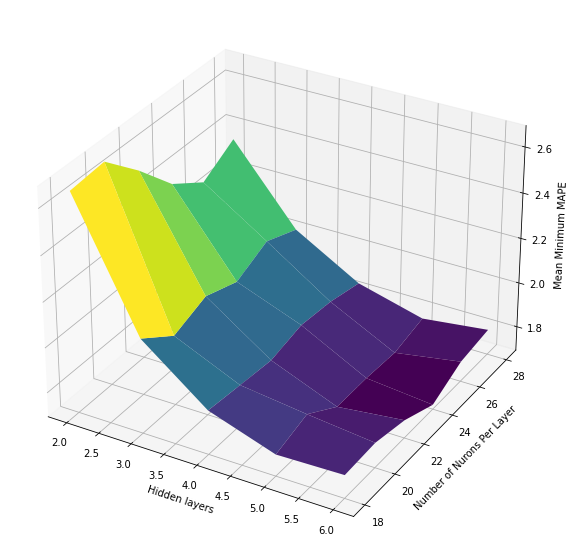

In [143]:

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(num_layers,layer_sizes_array,min_mape_mean[:,:5],cmap = 'viridis')
#ax.scatter3D(3,18,min_mape_mean[3,3])
ax.view_init(30,300)
ax.set_xlabel('Hidden layers')
ax.set_ylabel('Number of Nurons Per Layer')
ax.set_zlabel('Mean Minimum MAPE')

In [149]:
fig.savefig('../Figures/Layers.png',dpi = 300)